<h1>Base de la simulation aléatoire</h1>


In [1]:
import math
import numpy as np
import scipy.stats as scs
import matplotlib.pyplot as plt
import numpy.random as random
from time import time

<h2>Exercice 1 : Points dans le plan</h2>


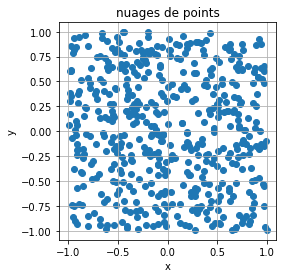

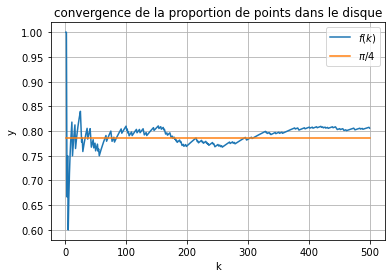

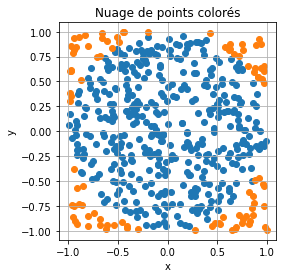

In [2]:
def uniforme_continue(a,b):
    return a + (b-a)*random.rand()

def inthedisk(a,b):
    return a**2+b**2 < 1

def test_disque(N):
    
    Z = np.zeros((2,N))
    for i in range(N):
        Z[0,i] = uniforme_continue(-1,1)
        Z[1,i] = uniforme_continue(-1,1)
    plt.figure()
    plt.title('nuages de points')
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect(aspect = 'equal')
    plt.scatter(Z[0,:],Z[1,:])
    plt.show()
    
    point_dans_le_disque = 0
    f = np.zeros(N)
    for i in range(N):
        if inthedisk(Z[0,i],Z[1,i]):
            point_dans_le_disque+=1
        f[i] = point_dans_le_disque/(i+1)
    plt.figure()
    plt.plot(range(1,N+1),f)
    plt.plot([1,N+1],[math.pi/4,math.pi/4])
    plt.grid()
    plt.xlabel('k')
    plt.ylabel('y')
    plt.title('convergence de la proportion de points dans le disque')
    plt.legend([u'$f(k)$',u'$\pi/4$'])
    plt.show()  
    
    Zplus = []
    Zmoins = []
    for i in range(N):
        if inthedisk(Z[0,i],Z[1,i]):
            Zmoins.append([Z[0,i],Z[1,i]])
        else:
            Zplus.append([Z[0,i],Z[1,i]])
    plt.figure()
    plt.grid()
    plt.scatter([x[0] for x in Zmoins],[x[1] for x in Zmoins])
    plt.scatter([x[0] for x in Zplus],[x[1] for x in Zplus])
    plt.xlabel('x')
    plt.ylabel('y')
    plt.gca().set_aspect(aspect = 'equal')
    plt.title('Nuage de points colorés')
    plt.show()     
            
    
    
test_disque(500)

<h2>Exercice 2 : Représentation Graphique d’une probabilité discrète</h2>


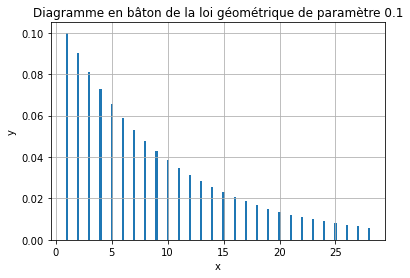

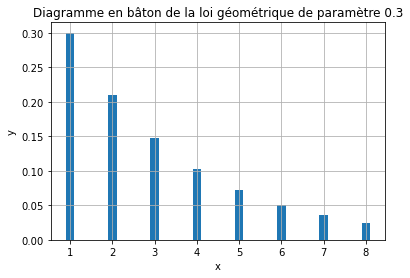

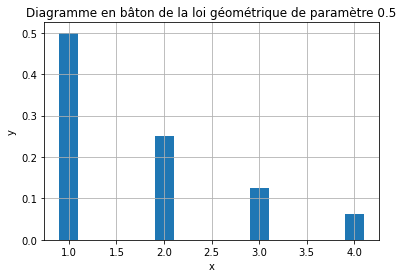

In [3]:
def loi_baton_geom(p):
    m = math.floor(math.log(0.05)/math.log(1-p))
    abscisses = range(1,m+1)
    ordonnees = np.zeros(m)
    for x in range(m):
        ordonnees[x] = p*(1-p)**x
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.bar(abscisses,ordonnees,width = 0.2)
    plt.title('Diagramme en bâton de la loi géométrique de paramètre '+ str(p))
    plt.show()     
    

loi_baton_geom(0.1)
loi_baton_geom(0.3)
loi_baton_geom(0.5)

<h2>Exercice 3 : Représentation Graphique d’une probabilité discrète</h2>

<Figure size 432x288 with 0 Axes>

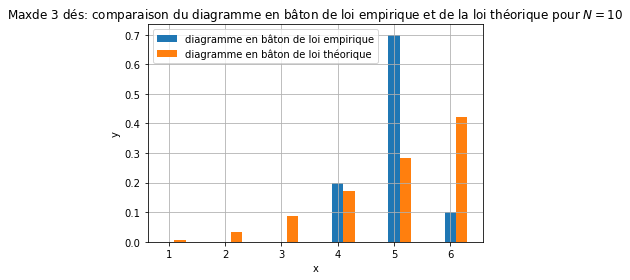

<Figure size 432x288 with 0 Axes>

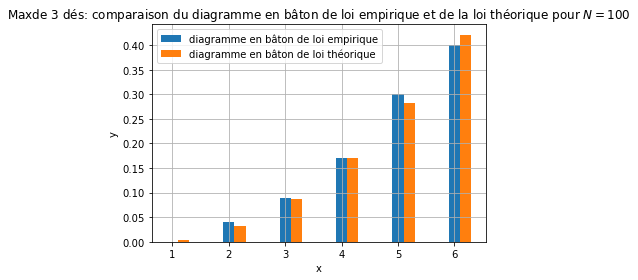

<Figure size 432x288 with 0 Axes>

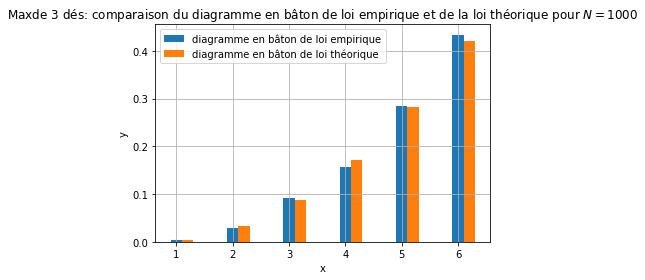

In [4]:
def de():
    return math.ceil(6*random.rand())
def max3de():
    return max([de(),de(),de()])

def test_max3de(N):
    z = np.zeros(N)
    for i in range(N):
        z[i] = max3de()
    card = plt.hist(z, [1,2,3,4,5,6,7])
    plt.clf()
    plt.figure()
    plt.grid()
    plt.xlabel('x')
    plt.ylabel('y')
    plt.bar(range(1,7),card[0]/N,width = 0.2)
    plt.bar(np.arange(1,7)+0.2,[(i**3-(i-1)**3)/6**3 for i in range(1,7)],width = 0.2)
    plt.title('Maxde $3$ dés: comparaison du diagramme en bâton de loi empirique et de la loi théorique pour $N=$'+str(N))
    plt.legend([u'diagramme en bâton de loi empirique',u'diagramme en bâton de loi théorique'])
    plt.show()  
    
    
test_max3de(10)
test_max3de(100)
test_max3de(1000)

<h2>Exercice 4 : Variable géométrique</h2>


In [5]:
def geometrique1(p):
    q = 0
    u = random.rand()
    k = 0
    while u > q:
        k = k+1
        q = q + (1-p)**(k-1)*p
    return k

def geometrique2(p):
    k = 1
    while np.random.rand()>p:
        k = k+1
    return k

def geometrique3(p):
    return math.ceil(math.log(random.rand())/math.log(1-p))

def geometrique4(p):
    return scs.geom.rvs(p)

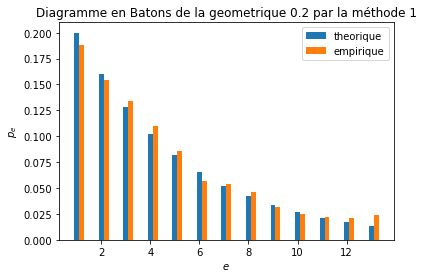

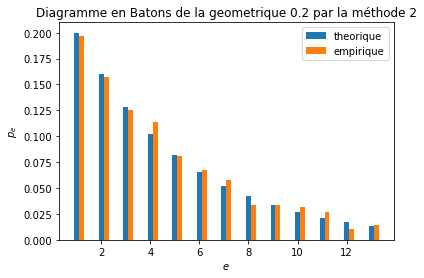

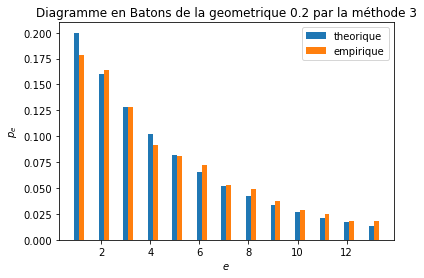

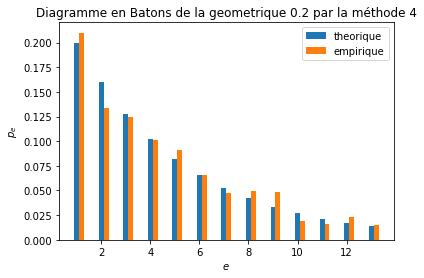

In [6]:
def test_diagramme(algogeom,s,n,p):
    borne = math.floor(math.log(0.05)/math.log(1-p))
    x = np.array(range(1,borne+1))
    y = [(1-p)**(i-1)*p for i in x]
    width = 0.2
    cardinal = np.zeros(borne)
    for i in range(n):
        c = algogeom(p)
        if c < borne+1:
            cardinal[c-1] = cardinal[c-1]+1
    frequence = cardinal/n
    fig = plt.figure()
    plt.bar(x, y, width,align = 'center', label='theorique')
    plt.xlabel('$e$')
    plt.ylabel('$p_e$')
    plt.title('Diagramme en Batons de la geometrique ' + str(p) + ' par la méthode '+str(s))
    plt.bar(x+0.2, frequence, width,align = 'center', label='empirique')
    plt.legend()
    plt.show()
test_diagramme(geometrique1,1,1000,0.2)
test_diagramme(geometrique2,2,1000,0.2)
test_diagramme(geometrique3,3,1000,0.2)
test_diagramme(geometrique4,4,1000,0.2)

In [7]:
def test_temps(algogeom,s,n,p):    
    t1 = time()
    [algogeom(p) for i in range(n)]
    t2 = time()
    temps1 = t2 - t1
    print("La methode a pris ", temps1, " secondes")
test_temps(geometrique1,1,10000,0.2)
test_temps(geometrique2,2,10000,0.2)
test_temps(geometrique3,3,10000,0.2)
test_temps(geometrique4,4,10000,0.2)

La methode a pris  0.031005859375  secondes
La methode a pris  0.028805017471313477  secondes
La methode a pris  0.011989116668701172  secondes
La methode a pris  0.5828852653503418  secondes


<h2>Exercice 5 : Variable de Poisson</h2>



In [8]:
def poisson1(l):
    k=0
    pk=math.exp(-l)
    qk = pk
    u = random.rand()
    while(u>qk):
        k=k+1
        pk=l*pk/k
        qk=qk+pk
    return k

def poisson2(l):
    n = 0
    u = random.rand()
    while u>math.exp(-l):
        u = u * random.rand()
        n = n+1
    return n

def poisson3(l):
    return scs.poisson.rvs(l)

def diagrammebaton(algo,borne,theo,N):
    x = np.array(range(borne+1))
    y = [theo(i) for i in x]
    width = 0.05
    cardinal = np.zeros(len(x))
    for i in range(N):
        c = algo()
        if c < borne+1:
            cardinal[c] = cardinal[c]+1
    frequence = cardinal/N
    fig = plt.figure()
    plt.bar(x, y, width,align = 'center', label='theorique')
    plt.scatter(x,y,color='k')
    plt.xlabel('$e$')
    plt.ylabel('$p_e$')
    plt.title('Diagramme en Batons')
    plt.bar(x+0.2, frequence, width,align = 'center', label='empirique')
    plt.scatter(x+0.2,frequence,color='k')
    plt.legend()
    plt.show()


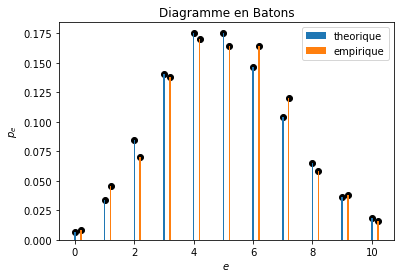

In [11]:
N=500
diagrammebaton(lambda:poisson1(2)+poisson1(3),10,lambda k:math.exp(-5)*5**k/math.factorial(k),N)


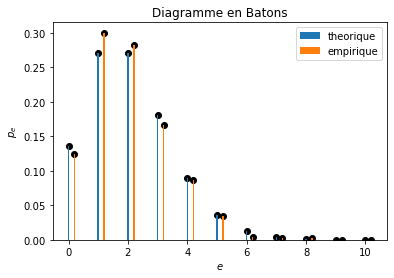

In [12]:
def decimation(l,p):
    x = poisson1(l)
    return sum([1 for i in range(x) if random.rand()<p])
diagrammebaton(lambda:decimation(4,0.5),10,lambda k:math.exp(-2)*2**k/math.factorial(k),N)